In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
plt.style.use('classic')
import numpy as np

In [2]:
all_df = pd.read_csv('../data/baby_names_all_years.csv')
all_df.sample(5)

,name,gender,frequency,year
65456,Nyah,F,105,2020
1507837,Scotty,F,5,1960
313767,Elnathan,M,40,2013
515475,Jireth,F,5,2007
1721866,Janise,F,9,1939


In [3]:
year = 1880

def parse_dataset(year):
    file_path = f'../data/names/yob{year}.txt'
    df = pd.read_csv(file_path, names = ['name', 'gender', 'frequency'])
    return df

parse_dataset(2020)['frequency'].sum()

3333981

# GENDER AMBIGUOUS NAMES

### A FRIEND OF MINE IS EXPECTING A BABY. HE WOULD LIKE HIS BABY TO HAVE A GENDER NEUTRAL NAME BUT WOULD ASO LIKE TO KNOW HOW POPULAR THESE NAMES ARE. FOR THIS PROJECT, I SET AN AIM OF CREATING A SIMPLE VISUALISATION TO MEET THIS NEED.

##### Ideally, I will be able to define 'ambiguity factor' against each name, weighting the male and female frequencies (totals) against one another, and then sort the lists by this weighting...

> Starting with a spcific name yr2020, find the proportionate ambiguity value

In [ ]:
## CREATING A DATAFRAME OF Charlie'S IN 2020

df_charlie_2020 = parse_dataset(2020)[parse_dataset(2020)['name']=='Charlie']
df_charlie_2020

## Test that the ambiguity proportion works, mathematically... 
## FINDING THE TOTAL FREQ OF ALEX'S IN 2020
ttl_charlie2020 = df_charlie_2020['frequency'].sum()
ttl_charlie2020

In [ ]:
## CREATING A DATAFRAME OF FEMALE ALEX'S IN 2020
fem_charlie2020 = df_charlie_2020[df_charlie_2020['gender']=='F']

## FINDING THE TOTAL FREQ OF FEMALE ALEX'S IN 2020
total_f_charlie2020 = fem_charlie2020['frequency'].sum()
total_f_charlie2020

In [ ]:
## CREATING A DATAFRAME OF MALE ALEX'S IN 2020
men_charlie2020 = df_charlie_2020[df_charlie_2020['gender']=='M']

## FINDING THE TOTAL FREQ OF MALE ALEX'S IN 2020
total_m_charlie2020 = men_charlie2020['frequency'].sum()
total_m_charlie2020

In [ ]:
## FIND THE PERCENTAGE OF MALES

charlie2020_men_pc = round((total_m_charlie2020 / ttl_charlie2020)*100,2)
charlie2020_men_pc

In [ ]:
## FIND THE PERCENTAGE OF FEMALES

charlie2020_fem_pc = round((total_f_charlie2020 / ttl_charlie2020)*100,2)
charlie2020_fem_pc

In [ ]:
## CREATE A PROPORTIONATE VALUE THAT CAN BE USED TO SORT THE LIST / CONTRIBUTE AS A PLOT VARIABLE

## a completely ambiguous name will be 50/50 male & female...
## ... so the closer a gender percentage is to 50, the higher the amgibuity.
## Therefore the proportion should be equal to one of the gender's percentage but limited at 50...
## ... if the percentage is in exceass of 50, it's negative value is added to 100:

ambig_fctr_Alex2020 = charlie2020_fem_pc *2

if ambig_fctr_Alex2020 > 50:
    ambig_fctr_Alex2020 = round((-charlie2020_fem_pc + 100)*2,2)

ambig_fctr_Alex2020

# in a range of 0 - 50, the closer to 50, the highrt the ambiguity of the name!

## Background on Gender Ambiguous Baby Names
#### How have their Popularity changed over time?

In [4]:
def freq_sum(year):
    """Provides the total frequency of babies for a given year"""
    data_yr = parse_dataset(year)
    pop_total = data_yr['frequency'].sum()
    return pop_total

freq_sum(2020)

3333981

In [5]:
def all_male_sum(year):
    """Provides the total frequency of babies for a given year"""
    df_male_yr = parse_dataset(year)[parse_dataset(year)['gender']=='M']
    male_pop_total = df_male_yr['frequency'].sum()
    return male_pop_total

all_male_sum(2020)

1721588

In [6]:
def all_female_sum(year):
    """Provides the total frequency of babies for a given year"""
    df_female_yr = parse_dataset(year)[parse_dataset(year)['gender']=='F']
    female_pop_total = df_female_yr['frequency'].sum()
    return female_pop_total

all_female_sum(2020)

1612393

In [7]:
yearly_genders_dict = {'Year':[], 'Total':[], 'Males':[], 'Females':[]}

for year in range(1980, 2023):
    yr_ttl = freq_sum(year)
    male_ttl = all_male_sum(year)
    female_ttl = all_female_sum(year)
    yearly_genders_dict['Total'].append(yr_ttl)
    yearly_genders_dict['Males'].append(male_ttl)
    yearly_genders_dict['Females'].append(female_ttl)
    yearly_genders_dict['Year'].append(year)
    annual_gender_population = pd.DataFrame(yearly_genders_dict)
    
#annual_gender_population.head()
annual_gender_population.tail()
#annual_gender_population.sample(5)

,Year,Total,Males,Females
38,2018,3511750,1813377,1698373
39,2019,3465821,1790682,1675139
40,2020,3333981,1721588,1612393
41,2021,3379713,1743913,1635800
42,2022,3361896,1733166,1628730


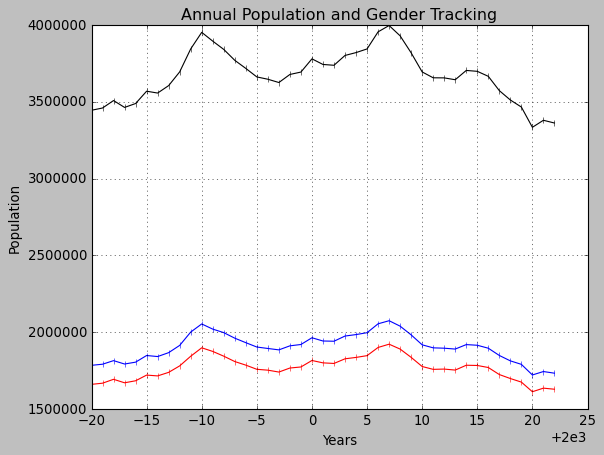

In [8]:
plt.figure(figsize=(8,6))
plt.plot(annual_gender_population['Year'], annual_gender_population['Total'], marker='|', color='black', label='Population Total')
plt.plot(annual_gender_population['Year'], annual_gender_population['Males'], marker='|', color='blue', label='Male Population')
plt.plot(annual_gender_population['Year'], annual_gender_population['Females'], marker='|', color='red', label='Female Population')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Annual Population and Gender Tracking')
plt.grid()
plt.show()

In [9]:
yearly_gender_pc_dict = {'Year':[], 'Total':[], 'Total Males':[], 'Total Females':[], 'Percentage of Males':[], 'Percentage of Females':[]}

for year in range(1980, 2023):
    yr_ttl = freq_sum(year)
    male_ttl = all_male_sum(year)
    female_ttl = all_female_sum(year)    
    male_pc = round((male_ttl / yr_ttl) * 100,2)
    female_pc = round((female_ttl / yr_ttl) * 100,2)
    yearly_gender_pc_dict['Total'].append(yr_ttl)
    yearly_gender_pc_dict['Total Males'].append(male_ttl)
    yearly_gender_pc_dict['Total Females'].append(female_ttl)    
    yearly_gender_pc_dict['Percentage of Males'].append(male_pc)
    yearly_gender_pc_dict['Percentage of Females'].append(female_pc)    
    yearly_gender_pc_dict['Year'].append(year)
    annual_gender_percentages = pd.DataFrame(yearly_gender_pc_dict)

annual_gender_percentages.tail()

,Year,Total,Total Males,Total Females,Percentage of Males,Percentage of Females
38,2018,3511750,1813377,1698373,51.64,48.36
39,2019,3465821,1790682,1675139,51.67,48.33
40,2020,3333981,1721588,1612393,51.64,48.36
41,2021,3379713,1743913,1635800,51.60,48.40
42,2022,3361896,1733166,1628730,51.55,48.45


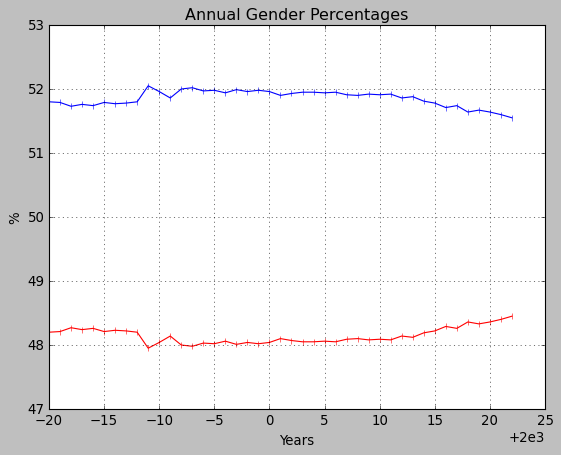

In [10]:
plt.figure(figsize=(8,6))
plt.plot(annual_gender_percentages['Year'], annual_gender_percentages['Percentage of Males'], marker='|', color='blue', label='Male %')
plt.plot(annual_gender_percentages['Year'], annual_gender_percentages['Percentage of Females'], marker='|', color='red', label='Female %')
plt.xlabel('Years')
plt.ylabel('%')
plt.title('Annual Gender Percentages')
plt.grid()
plt.show()

In [11]:
all_data_gender_dict = {'Gender':['Male','Female'], 'Population':[], 'Percentage':[]}

df_all_males = all_df[all_df['gender']=='M']
df_all_females = all_df[all_df['gender']=='F']

all_data_pop = all_df['frequency'].sum()
all_male_pop = df_all_males['frequency'].sum()
all_male_pc = round((all_male_pop/all_data_pop)*100,2)
all_female_pop = df_all_females['frequency'].sum()
all_female_pc = round((all_female_pop/all_data_pop)*100,2)

all_data_gender_dict['Population'].append(all_male_pop)
all_data_gender_dict['Population'].append(all_female_pop)
all_data_gender_dict['Percentage'].append(all_male_pc)
all_data_gender_dict['Percentage'].append(all_female_pc)

all_data_gender = pd.DataFrame(all_data_gender_dict)
all_data_gender

,Gender,Population,Percentage
0,Male,184615480,50.54
1,Female,180680711,49.46


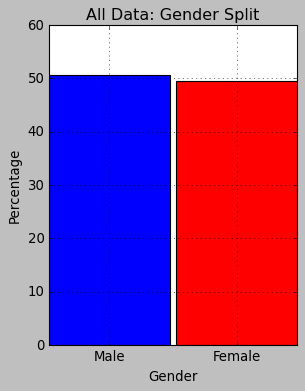

In [12]:
bar_colour = ['blue','red']

plt.figure(figsize=(4,5))
plt.bar(all_data_gender['Gender'],all_data_gender['Percentage'], width=0.95, color=bar_colour)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('All Data: Gender Split')
plt.grid()
plt.show()

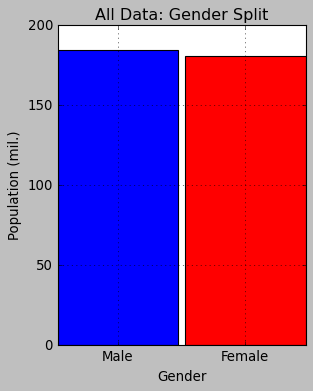

In [13]:
bar_colour = ['blue','red']

plt.figure(figsize=(4,5))
plt.bar(all_data_gender['Gender'],all_data_gender['Population']/1000000, width=0.95, color=bar_colour)
plt.xlabel('Gender')
plt.ylabel('Population (mil.)')
plt.title('All Data: Gender Split')
plt.grid()
plt.show()

In [14]:
## make a function to output dataframe of ambiguous male name

def df_amibg_male(year):
    df_male = parse_dataset(year)[parse_dataset(year)['gender']=='M']
    df_female = parse_dataset(year)[parse_dataset(year)['gender']=='F']
    mask_male = df_male['name'].isin(df_female['name'])
    df_ambig_male = df_male[mask_male]
    return df_ambig_male

df_amibg_male(2020).head()

,name,gender,frequency
17485,Liam,M,19828
17486,Noah,M,18407
17487,Oliver,M,14261
17488,Elijah,M,13172
17489,William,M,12643


In [15]:
## make a function to output dataframe of ambiguous female name

def df_amibg_female(year):
    df_male = parse_dataset(year)[parse_dataset(year)['gender']=='M']
    df_female = parse_dataset(year)[parse_dataset(year)['gender']=='F']
    mask_female = df_female['name'].isin(df_male['name'])
    df_ambig_female = df_female[mask_female]
    return df_ambig_female

df_amibg_female(2020).head()

,name,gender,frequency
0,Olivia,F,17664
1,Emma,F,15680
2,Ava,F,13179
3,Charlotte,F,13083
4,Sophia,F,13070


In [16]:
parse_dataset(2020)[parse_dataset(2020)['name']=='Olivia']

,name,gender,frequency
0,Olivia,F,17664
24004,Olivia,M,13


In [17]:
## make a function to output dataframe of unambiguous male name

def df_unamibg_male(year):
    df_male = parse_dataset(year)[parse_dataset(year)['gender']=='M']
    df_female = parse_dataset(year)[parse_dataset(year)['gender']=='F']
    mask_male = df_male['name'].isin(df_female['name'])
    df_unambig_male = df_male[~mask_male] # '~' creates an 'opposite' mask
    return df_unambig_male

df_unamibg_male(2020).head()

,name,gender,frequency
17539,Nathan,M,5693
17550,Colton,M,5014
17555,Santiago,M,4684
17559,Jeremiah,M,4572
17564,Robert,M,4386


In [18]:
# Check one name is male only

parse_dataset(2020)[parse_dataset(2020)['name']=='Nathan']

,name,gender,frequency
17539,Nathan,M,5693


In [19]:
## make a function to output dataframe of unambiguous female name

def df_unamibg_female(year):
    df_male = parse_dataset(year)[parse_dataset(year)['gender']=='M']
    df_female = parse_dataset(year)[parse_dataset(year)['gender']=='F']
    mask_female = df_female['name'].isin(df_male['name'])
    df_unambig_female = df_female[~mask_female] # '~' creates an 'opposite' mask
    return df_unambig_female

df_unamibg_female(2020).head()

,name,gender,frequency
11,Abigail,F,7891
14,Ella,F,7352
15,Elizabeth,F,7278
21,Eleanor,F,6375
23,Layla,F,6214


In [20]:
# Check one name is female only

parse_dataset(2020)[parse_dataset(2020)['name']=='Abigail']

,name,gender,frequency
11,Abigail,F,7891


In [21]:
annual_ambiguity_dict = {'Year':[], 
                         'Male-only Name %':[], 
                         'Female-only Name %':[], 
                         'Ambiguous Male Name %':[], 
                         'Ambiguous Female Name %':[]}


for year in range(1980, 2023):
    yr_ttl = freq_sum(year)

    male_only_ttl = df_unamibg_male(year)['frequency'].sum()
    male_only_pc = round((male_only_ttl/yr_ttl)*100,2)
    
    female_only_ttl = df_unamibg_female(year)['frequency'].sum()
    female_only_pc = round((female_only_ttl/yr_ttl)*100,2)
    
    male_ambig_ttl = df_amibg_male(year)['frequency'].sum()
    male_ambig_pc = round((male_ambig_ttl/yr_ttl)*100,2)
    
    female_ambig_ttl = df_amibg_female(year)['frequency'].sum()
    female_ambig_pc = round((female_ambig_ttl/yr_ttl)*100,2)
    
    annual_ambiguity_dict['Year'].append(year)
    annual_ambiguity_dict['Male-only Name %'].append(male_only_pc)
    annual_ambiguity_dict['Female-only Name %'].append(female_only_pc)
    annual_ambiguity_dict['Ambiguous Male Name %'].append(male_ambig_pc)
    annual_ambiguity_dict['Ambiguous Female Name %'].append(female_ambig_pc)
    
    df_annual_ambiguity = pd.DataFrame(annual_ambiguity_dict)

df_annual_ambiguity.head()

,Year,Male-only Name %,Female-only Name %,Ambiguous Male Name %,Ambiguous Female Name %
0,1980,4.76,10.94,47.04,37.26
1,1981,4.96,10.96,46.83,37.26
2,1982,4.71,10.84,47.02,37.43
3,1983,4.46,10.46,47.31,37.78
4,1984,4.65,10.33,47.09,37.93


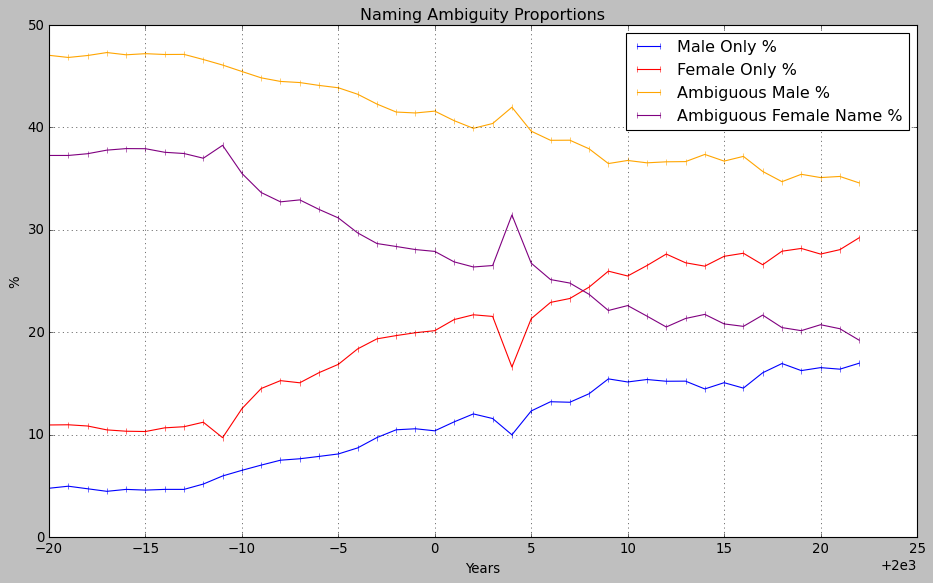

In [22]:
x_val = annual_gender_percentages['Year']

plt.figure(figsize=(14,8))
plt.plot(x_val, df_annual_ambiguity['Male-only Name %'], marker='|', color='blue', label='Male Only %')
plt.plot(x_val, df_annual_ambiguity['Female-only Name %'], marker='|', color='red', label='Female Only %')
plt.plot(x_val, df_annual_ambiguity['Ambiguous Male Name %'], marker='|', color='orange', label='Ambiguous Male %')
plt.plot(x_val, df_annual_ambiguity['Ambiguous Female Name %'], marker='|', color='purple', label='Ambiguous Female Name %')
plt.xlabel('Years')
plt.ylabel('%')
plt.title('Naming Ambiguity Proportions')
plt.legend()
plt.grid()
plt.show()

## Apply this and include as a new column to the 2020 Data Frame

#### Create a list of a given year which only holds gender ambiguous names

In [23]:
# Create a male DF for 2020

df_males2020 = parse_dataset(2020)[parse_dataset(2020)['gender']=='M']
df_males2020.head()

,name,gender,frequency
17485,Liam,M,19828
17486,Noah,M,18407
17487,Oliver,M,14261
17488,Elijah,M,13172
17489,William,M,12643


In [24]:
# Create a female DF for 2020

df_fem2020 = parse_dataset(2020)[parse_dataset(2020)['gender']=='F']
df_fem2020.head()

,name,gender,frequency
0,Olivia,F,17664
1,Emma,F,15680
2,Ava,F,13179
3,Charlotte,F,13083
4,Sophia,F,13070


In [25]:
# Create an only ambiguous list from the female DF

mask_ambig_fem2020 = df_fem2020['name'].isin(df_males2020['name']) 
df_ambig_fem2020 = df_fem2020[mask_ambig_fem2020]
df_ambig_fem2020.head()

,name,gender,frequency
0,Olivia,F,17664
1,Emma,F,15680
2,Ava,F,13179
3,Charlotte,F,13083
4,Sophia,F,13070


In [26]:
# Create an only ambiguous list from the male DF

mask_ambig_male2020 = df_males2020['name'].isin(df_fem2020['name']) 
df_ambig_male2020 = df_males2020[mask_ambig_male2020]
df_ambig_male2020.head()

,name,gender,frequency
17485,Liam,M,19828
17486,Noah,M,18407
17487,Oliver,M,14261
17488,Elijah,M,13172
17489,William,M,12643


In [27]:
# Concat the DF's

df_ambig2020 = pd.concat([df_ambig_male2020, df_ambig_fem2020], ignore_index=True)
df_ambig2020.head()

,name,gender,frequency
0,Liam,M,19828
1,Noah,M,18407
2,Oliver,M,14261
3,Elijah,M,13172
4,William,M,12643


### Adapt this list to combine the names and add extra columns for male & female percentage 

In [ ]:
# figure out how to use a for loop to recognise matching names and add columns for the above...

In [ ]:
# nope... google it...

In [ ]:
# the '.merge' function!

In [28]:
# merge the two amiguous lists by name so that both the male and female frequency columns
# are aligned with the names in each row

merged_ambig2020 = df_fem2020.merge(df_males2020, on='name')

#check that this has worked
merged_ambig2020.head()

,name,gender_x,frequency_x,gender_y,frequency_y
0,Olivia,F,17664,M,13
1,Emma,F,15680,M,18
2,Ava,F,13179,M,11
3,Charlotte,F,13083,M,7
4,Sophia,F,13070,M,11


In [29]:
# Adding new Total Frequency column and sorting the data by this.

merged_ambig2020['total frequency'] = merged_ambig2020['frequency_x'] + merged_ambig2020['frequency_y']

merged_ambig2020 = merged_ambig2020.sort_values(by='total frequency', ascending=False)

merged_ambig2020.head()

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency
1016,Liam,F,33,M,19828,19861
296,Noah,F,306,M,18407,18713
0,Olivia,F,17664,M,13,17677
1,Emma,F,15680,M,18,15698
1235,Oliver,F,23,M,14261,14284


In [30]:
# Adding new columns for percentage being male / female

merged_ambig2020['female_pc'] = round((merged_ambig2020['frequency_x'] / merged_ambig2020['total frequency']) * 100,2)

merged_ambig2020['male_pc'] = round((merged_ambig2020['frequency_y'] / merged_ambig2020['total frequency']) * 100,2)

#and check
merged_ambig2020.head()

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc
1016,Liam,F,33,M,19828,19861,0.17,99.83
296,Noah,F,306,M,18407,18713,1.64,98.36
0,Olivia,F,17664,M,13,17677,99.93,0.07
1,Emma,F,15680,M,18,15698,99.89,0.11
1235,Oliver,F,23,M,14261,14284,0.16,99.84


## Add a new column to the DataFrame for the ambiguity factor




##### at this point, I got stuck...

In [31]:
# Convert the DataFrame to dictionary, add a new & empty 'ambig_fctr' column 
# and checking if new column exists when displayed as DF

dict_test3 = merged_ambig2020.to_dict()

dict_test3['ambig_fctr'] = 0.00
df_test3 = pd.DataFrame(dict_test3)
df_test3.head()

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc,ambig_fctr
1016,Liam,F,33,M,19828,19861,0.17,99.83,0.0
296,Noah,F,306,M,18407,18713,1.64,98.36,0.0
0,Olivia,F,17664,M,13,17677,99.93,0.07,0.0
1,Emma,F,15680,M,18,15698,99.89,0.11,0.0
1235,Oliver,F,23,M,14261,14284,0.16,99.84,0.0


In [32]:
for key, value in dict_test3['male_pc'].items():
    if value > 50:
        dict_test3['ambig_fctr'][key] = round(-value + 100, 2)
    else:
        dict_test3['ambig_fctr'][key] = value

df_test3 = pd.DataFrame(dict_test3)
df_test3.head()

TypeError: 'float' object does not support item assignment

### _I GOT STUCK_


### ... so I moved on.

In [33]:
# The interesting part of the data for me is the highly ambiguous names.
# Therefore, I will filter the data to only retain the 'central' percentages...

ambig2020_male45 = merged_ambig2020[merged_ambig2020['male_pc']>45]
ambig2020_mids = ambig2020_male45[ambig2020_male45['female_pc']>45]
ambig2020_mids

#this produces 254 rows

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc
74,Charlie,F,2236,M,1869,4105,54.47,45.53
260,Jamie,F,393,M,349,742,52.96,47.04
290,Azariah,F,316,M,376,692,45.66,54.34
276,Bellamy,F,341,M,335,676,50.44,49.56
308,Robin,F,289,M,259,548,52.74,47.26
...,...,...,...,...,...,...,...,...
2577,Kekeli,F,5,M,5,10,50.00,50.00
2578,Keni,F,5,M,5,10,50.00,50.00
2658,Shy,F,5,M,5,10,50.00,50.00
2615,Myair,F,5,M,5,10,50.00,50.00


In [34]:
# Create a top 15 List of these highly ambiguous names, by order of popularity

mid_ambig_top15 = ambig2020_mids.head(15)
mid_ambig_top15

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc
74,Charlie,F,2236,M,1869,4105,54.47,45.53
260,Jamie,F,393,M,349,742,52.96,47.04
290,Azariah,F,316,M,376,692,45.66,54.34
276,Bellamy,F,341,M,335,676,50.44,49.56
308,Robin,F,289,M,259,548,52.74,47.26
327,Murphy,F,261,M,225,486,53.70,46.30
382,Campbell,F,195,M,165,360,54.17,45.83
394,Kacey,F,184,M,162,346,53.18,46.82
407,True,F,170,M,165,335,50.75,49.25
450,Sidney,F,141,M,166,307,45.93,54.07


In [35]:
mids_ambig_sample = ambig2020_mids.sample(15)
mids_ambig_sample15 = mids_ambig_sample.sort_values(by='total frequency', ascending=False)
mids_ambig_sample15

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc
545,Indiana,F,97,M,80,177,54.80,45.20
800,Lyrik,F,50,M,47,97,51.55,48.45
1223,Huntlee,F,23,M,20,43,53.49,46.51
1319,Jasiyah,F,20,M,20,40,50.00,50.00
1388,Brixtyn,F,18,M,16,34,52.94,47.06
1502,Rollins,F,16,M,15,31,51.61,48.39
1618,Troi,F,14,M,15,29,48.28,51.72
1796,Omi,F,11,M,11,22,50.00,50.00
1787,Majestic,F,11,M,11,22,50.00,50.00
2042,Haygen,F,8,M,9,17,47.06,52.94


### Plot this data as a Scatter Plot, with a different marker for each name...

In [36]:
from matplotlib import pyplot as plt
plt.style.use('classic')
import numpy as np

### Ideally, I want to create a scatter plot which displays...
+ an ambiguity scale for the names... left-of-centre indicates female and right, male (x-axis)
+ the popularity of name (y-axis)
+ and identifier for each name... unique markers and a relevant legend

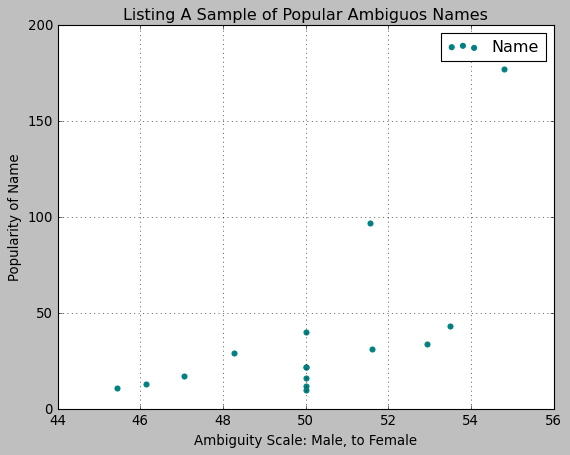

In [37]:
# Creating a plot from the Sample Data Frame...

x_vals = mids_ambig_sample15['female_pc']
y_vals = mids_ambig_sample15['total frequency']

plt.figure(figsize=(8,6))
plt.scatter(x_vals, y_vals, color='teal', marker = 'o', label='Name')
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.ylabel('Popularity of Name')
plt.title('Listing A Sample of Popular Ambiguos Names')
plt.grid()
plt.legend()
plt.show()

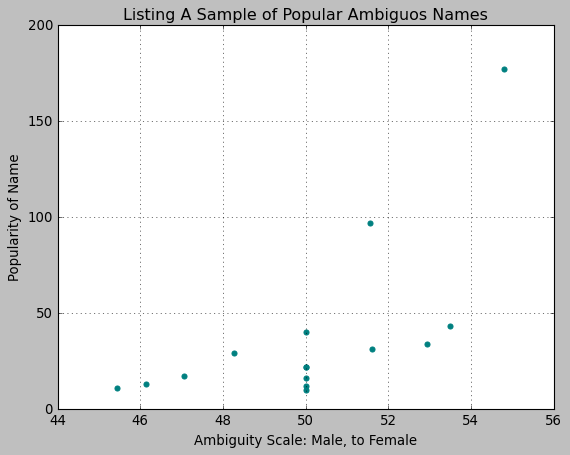

In [38]:
# ISSUE: The legend can often block the plots so this has been removed:

x_vals = mids_ambig_sample15['female_pc']
y_vals = mids_ambig_sample15['total frequency']

plt.figure(figsize=(8,6))
plt.scatter(x_vals, y_vals, color='teal', marker = 'o', label='Name')
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.ylabel('Popularity of Name')
plt.title('Listing A Sample of Popular Ambiguos Names')
plt.grid()
plt.show()

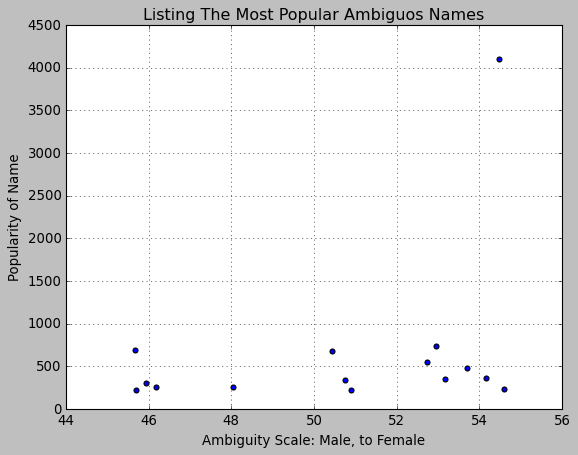

In [39]:
# and I wanted to see how the most popular names would plot...

plt.figure(figsize=(8,6))
plt.scatter(mid_ambig_top15['female_pc'], mid_ambig_top15['total frequency'], marker='o', label='Name')
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.ylabel('Popularity of Name')
plt.title('Listing The Most Popular Ambiguos Names')
plt.grid()
plt.show()

In [40]:
# find an quicker way to create new sample DF's and plot

# Generate sample Data Frames from the high-ambiguity names.
# sample size based on inputted number

def generate_df_sample(number):
    mids_ambig_sample = ambig2020_mids.sample(number)
    mids_ambig_sample_num = mids_ambig_sample.sort_values(by='total frequency', ascending=False)
    return mids_ambig_sample_num


sample_DF = generate_df_sample(20)
sample_DF

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc
554,Honor,F,94,M,103,197,47.72,52.28
774,Royale,F,54,M,47,101,53.47,46.53
800,Lyrik,F,50,M,47,97,51.55,48.45
1077,Sakari,F,30,M,25,55,54.55,45.45
1276,Tamari,F,22,M,20,42,52.38,47.62
1289,Joud,F,21,M,19,40,52.50,47.50
1386,Avyn,F,18,M,17,35,51.43,48.57
1502,Rollins,F,16,M,15,31,51.61,48.39
1726,Marvelous,F,12,M,12,24,50.00,50.00
1915,Audi,F,9,M,9,18,50.00,50.00


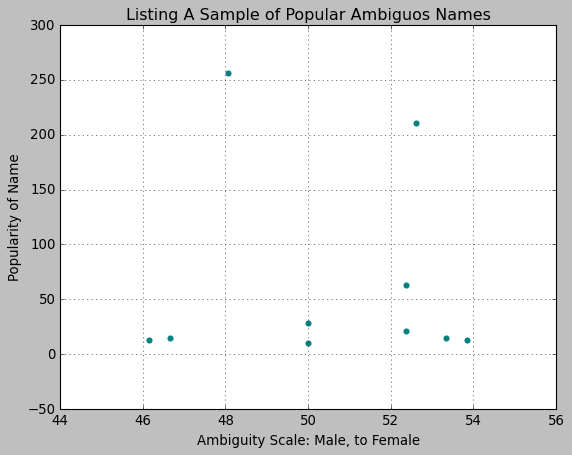

In [41]:
#... and then a sample plotter:

sample_DF = generate_df_sample(10)

x_vals = sample_DF['female_pc']
y_vals = sample_DF['total frequency']

plt.figure(figsize=(8,6))
plt.scatter(x_vals, y_vals, color='teal', marker = 'o', label='Name')
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.ylabel('Popularity of Name')
plt.title('Listing A Sample of Popular Ambiguos Names')
plt.grid()
plt.show()

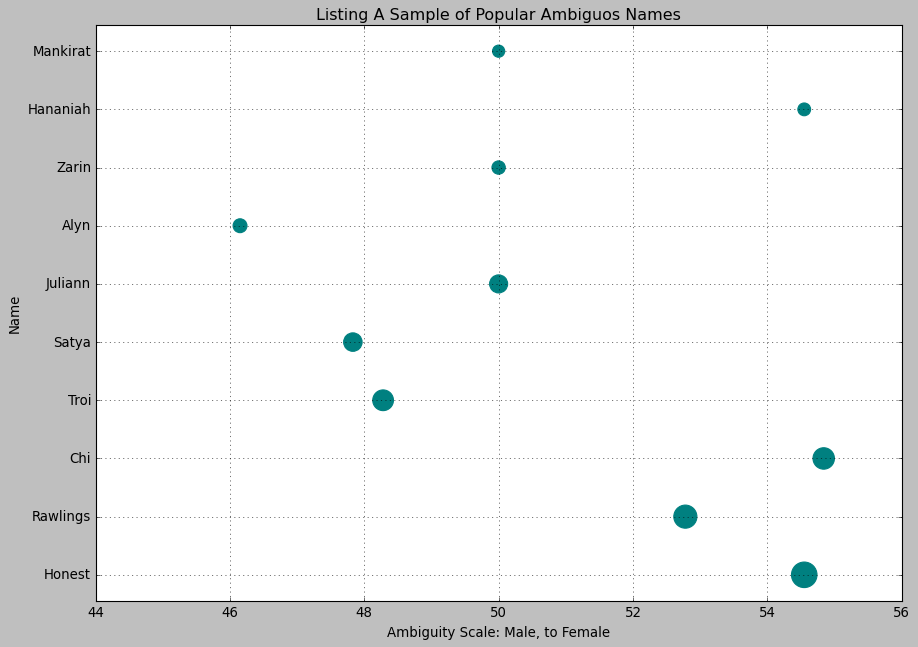

In [42]:
# while I'm stuck on how to create different markers for each name, is there a better way to plot currently?

# retain the Ambiguity Scale, list the names on an axis, use the size of the plot to determine popularity. 

sample_DF = generate_df_sample(10)

x_vals = sample_DF['female_pc']
y_vals = sample_DF['name']
weighting = sample_DF['total frequency'] * 12

plt.figure(figsize= (13,9))
plt.scatter(x = x_vals, y = y_vals, s = weighting, color='teal', marker = 'o', label='Name')
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.ylabel('Name')
plt.title('Listing A Sample of Popular Ambiguos Names')
plt.grid()
plt.show()

In [43]:
# Create a function which generates an Ambiguous Name sample list...
#... with the flexibility of choosing the year, the mid-range scope, and the sample size

def sample_name_generator(year, pc_range, size):
    df_males = parse_dataset(year)[parse_dataset(year)['gender']=='M']
    df_fem = parse_dataset(year)[parse_dataset(year)['gender']=='F']
    
    mask_ambig_fem = df_fem['name'].isin(df_males['name']) 
    df_ambig_fem = df_fem[mask_ambig_fem]
    
    mask_ambig_male = df_males['name'].isin(df_fem['name']) 
    df_ambig_male = df_males[mask_ambig_male]
    
    df_ambig = pd.concat([df_ambig_male, df_ambig_fem], ignore_index=True)
    
    merged_ambig = df_fem.merge(df_males, on='name')
    merged_ambig['total frequency'] = merged_ambig['frequency_x'] + merged_ambig['frequency_y']
    merged_ambig = merged_ambig.sort_values(by='total frequency', ascending=False)
    
    merged_ambig['female_pc'] = round((merged_ambig['frequency_x'] / merged_ambig['total frequency']) * 100,2)
    merged_ambig['male_pc'] = round((merged_ambig['frequency_y'] / merged_ambig['total frequency']) * 100,2)
    
    ambig_mid_male_fltr = merged_ambig[merged_ambig['male_pc']>(pc_range)]
    ambig_all_mid = ambig_mid_male_fltr[ambig_mid_male_fltr['female_pc']>(pc_range)]
    
    mids_ambig_sample = ambig_all_mid.sample(size)
    return mids_ambig_sample

sample_name_generator(2022, 45, 10)

,name,gender_x,frequency_x,gender_y,frequency_y,total frequency,female_pc,male_pc
1650,Saiyr,F,14,M,14,28,50.00,50.00
1982,Aymar,F,9,M,8,17,52.94,47.06
2622,Kilyn,F,5,M,5,10,50.00,50.00
853,Lyrik,F,48,M,45,93,51.61,48.39
230,Azariah,F,476,M,427,903,52.71,47.29
1492,Uriyah,F,17,M,19,36,47.22,52.78
1329,Rei,F,21,M,19,40,52.50,47.50
121,Tatum,F,1152,M,1050,2202,52.32,47.68
2337,Zani,F,7,M,6,13,53.85,46.15
2704,Shaden,F,5,M,5,10,50.00,50.00


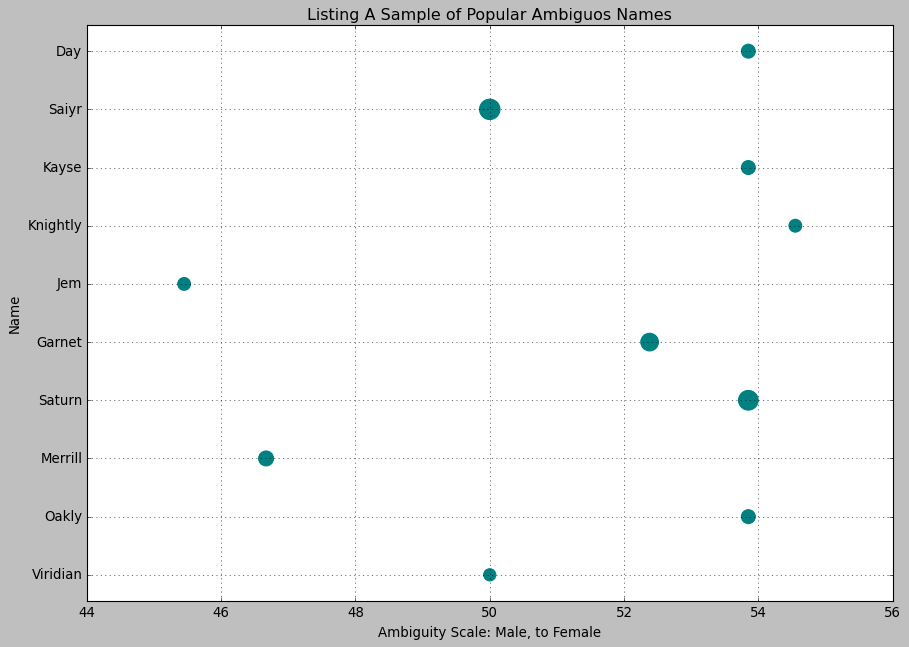

In [44]:
#... and plot this to create the visualisation

flex_sample_plotter = sample_name_generator(2022, 45, 10)

x_vals = flex_sample_plotter['female_pc']
y_vals = flex_sample_plotter['name']
weighting = flex_sample_plotter['total frequency'] * 12

plt.figure(figsize= (13,9))
plt.scatter(x = x_vals, y = y_vals, s = weighting, color='teal', marker = 'o', label='Name')
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.ylabel('Name')
plt.title('Listing A Sample of Popular Ambiguos Names')
plt.grid()
plt.show()

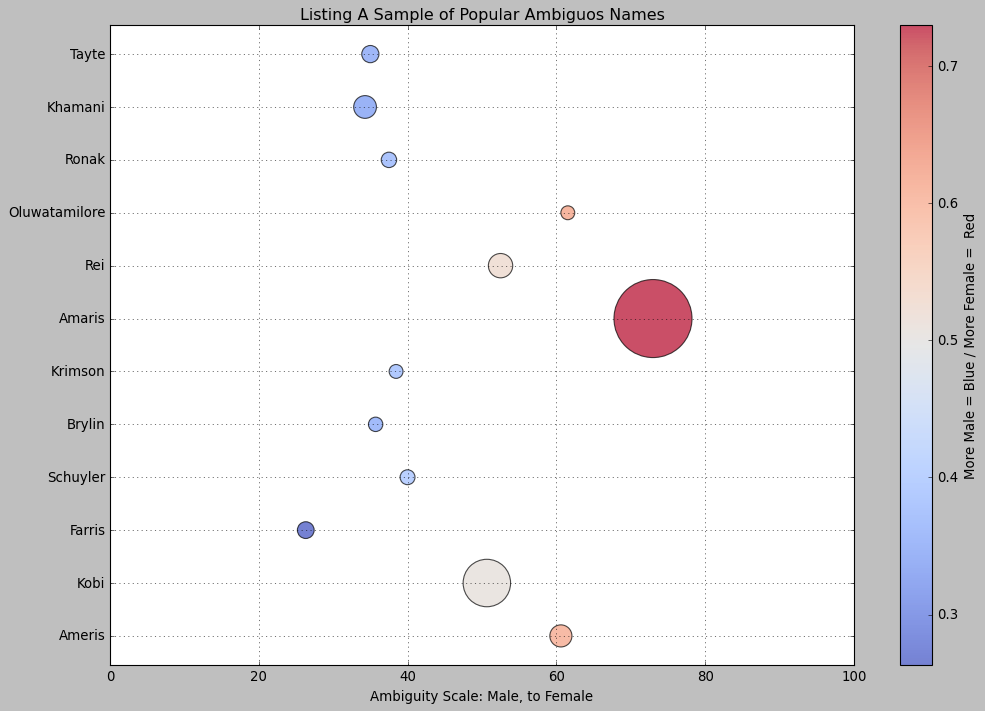

In [49]:
# setting a colour-scale linked to the female proportion and forcing 50% to be the mid-point on x-axis.

flex_sample_plotter = sample_name_generator(2022, 25, 12)

x_vals = flex_sample_plotter['female_pc']
y_vals = flex_sample_plotter['name']
center_value = 50
weighting = flex_sample_plotter['total frequency'] * 12

plt.figure(figsize=(15, 10))


plt.scatter(x_vals,  # x-axis position
            y_vals,  # y-axis position
            s=weighting,  # text size based on population
            c=x_vals/ 100,  # color based on female%
            cmap='coolwarm',  # colormap
            alpha=0.7,  # transparency
            label= y_vals)  # label for legend

x_margin = 50  # The margin to the left and right of the center_value
plt.xlim(center_value - x_margin, center_value + x_margin)

# Set labels and title
plt.xlabel('Ambiguity Scale: Male, to Female')
plt.title('Listing A Sample of Popular Ambiguos Names')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('More Male = Blue / More Female =  Red')

# Show the plot
plt.grid()
#plt.legend(loc='upper right', bbox_to_anchor=(2, 0.8))
plt.show()


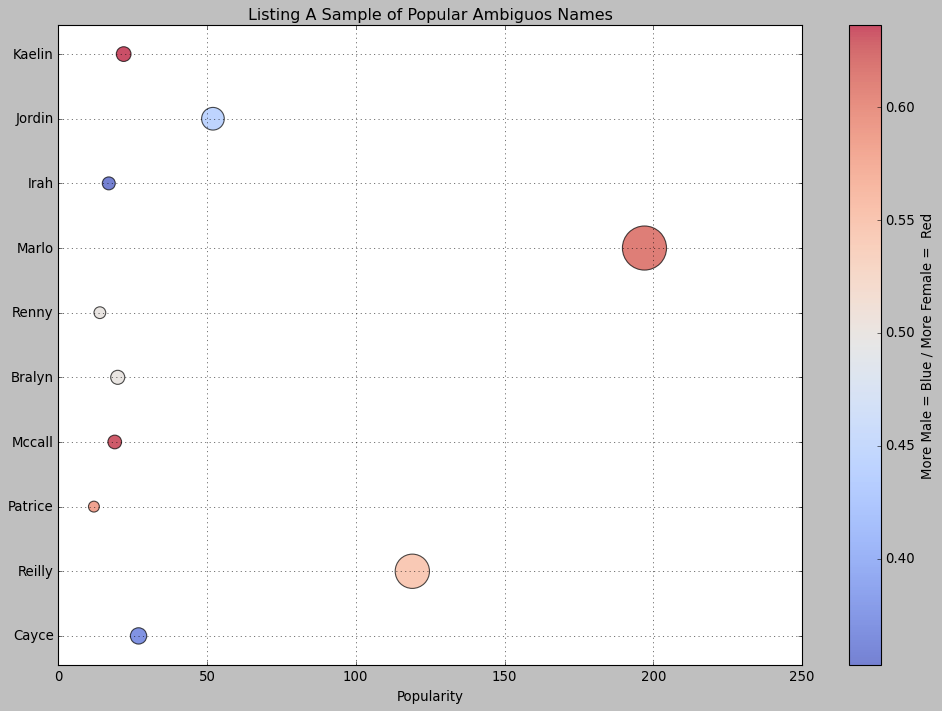

In [48]:
## For an alternative view, plotting names on y-axis, with population (or popularity) along x-axis...
## but retaining the female proportion as a colour-scale and popularity also as a size scaler.

flex_sample_plotter = sample_name_generator(2022, 35, 10)


y_vals = flex_sample_plotter['name']
x_vals = flex_sample_plotter['total frequency']
weighting = flex_sample_plotter['total frequency'] * 8
clr_scale = (flex_sample_plotter['female_pc'])/100

plt.figure(figsize=(15, 10))


plt.scatter(x_vals,  # x-axis position
            y_vals,  # y-axis position
            s=weighting,  # text size based on population
            c=clr_scale,  # color based on female%
            cmap='coolwarm',  # colormap
            alpha=0.7,  # transparency
            label= 'Popularity')  # label for legend

# Set labels and title
plt.xlabel('Popularity')
plt.title('Listing A Sample of Popular Ambiguos Names')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('More Male = Blue / More Female =  Red')

# Show the plot
plt.grid()
#plt.legend(loc='upper right', bbox_to_anchor=(2, 0.8))
plt.show()

## Notes...

#### Limitations and issues:
+ working out how to add the ambiguity factor in the dataframe
+ generate a better / more user friendly scatter plot:


> Issues in: overlapping / marker ID / scale

> Could be aided by: 3D scatter / loop filtering the DF to have data for each name / plotly?

> https://realpython.com/visualizing-python-plt-scatter/#customizing-markers-in-scatter-plots